# Gapminder Exercise
- Description:
    The gapminder is a set of socioeconomic data about populations, like GDP or expected life span
    Technical specifications of classic cars.
- Number of Observations: 1704
- Number of Variables: 6
- Variables:
    - country
    - continent
    - year
    - lifeExp: life expectancy at birth
    - gdpPercap: GDP per capita in constant PPP dollars

Reference:
FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE

For more information see **GAPMINDER** https://www.gapminder.org/

## Import Libraries
Hint: pandas, seaborn

In [1]:
# %load "../solutions/import_libraries"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings

warnings.filterwarnings("ignore")

## Configure Visualization Aesthetics
Hint: sns.set_theme(), sns.set_style(), sns.set_context()
Try: %matplotlib 'inline' | 'notebook'

In [3]:
# %load "../solutions/set_visualization.py"
# Reset Default Parameters
sns.set_theme()

# Set Seaborn Figure Styles: ["darkgrid", "whitegrid", "dark", "white", "ticks"]
sns.set_style("whitegrid")

# Removing Axes Spines
# sns.despine()

# Set Scaling Plot Elements: ["paper", "notebook", "talk", "poster"]
sns.set_context("notebook")


## Get the data
Hint: pd.read_csv()

In [4]:
# %load "../solutions/get_data.py"
df = pd.read_csv('../datasets/gapminder.csv', index_col=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1704 entries, 1 to 1704
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 93.2+ KB


## Explore the data
Hint: df.head(), df.describe()

In [5]:
# %load "../solutions/explore_data.py"
# Display First Rows
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1952,28.801,8425333,779.445314
2,Afghanistan,Asia,1957,30.332,9240934,820.853030
3,Afghanistan,Asia,1962,31.997,10267083,853.100710
4,Afghanistan,Asia,1967,34.020,11537966,836.197138
5,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
filt = df["year"] == 1952
df[filt].describe()

,year,lifeExp,pop,gdpPercap
count,142.0,142.000000,1.420000e+02,142.000000
mean,1952.0,49.057620,1.695040e+07,3725.276046
std,0.0,12.225956,5.810086e+07,9321.064786
min,1952.0,28.801000,6.001100e+04,298.846212
25%,1952.0,39.059000,1.452026e+06,864.752389
50%,1952.0,45.135500,3.943953e+06,1968.528344
75%,1952.0,59.765000,9.168198e+06,3913.492777
max,1952.0,72.670000,5.562635e+08,108382.352900


In [7]:
# Display Statistical Summary
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


## Visualize the data

### Counting Data
Hint: sns.countplot()

In [8]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [9]:
df["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

<Axes: xlabel='continent', ylabel='count'>

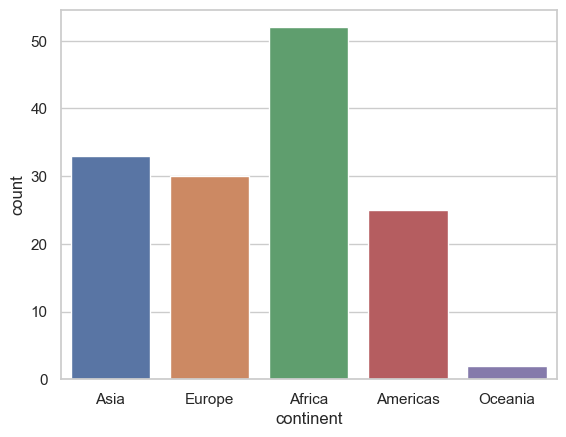

In [10]:
filt = (df["year"] == 1952)
sns.countplot(data=df[filt], x="continent")

### Distribution of Data
Hint: sns.histplot(), sns.displot()

<Axes: xlabel='lifeExp', ylabel='Count'>

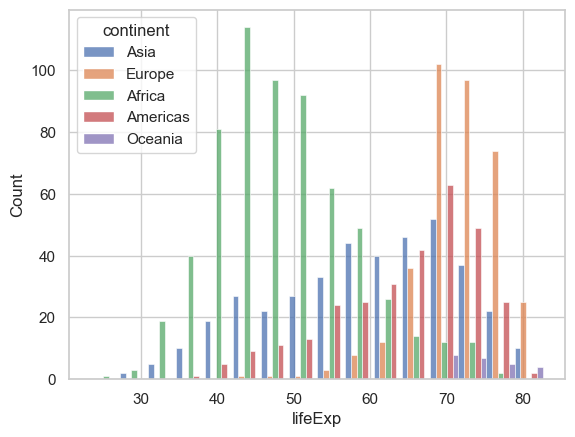

In [11]:
sns.histplot(data=df, x="lifeExp", hue="continent", multiple="dodge")

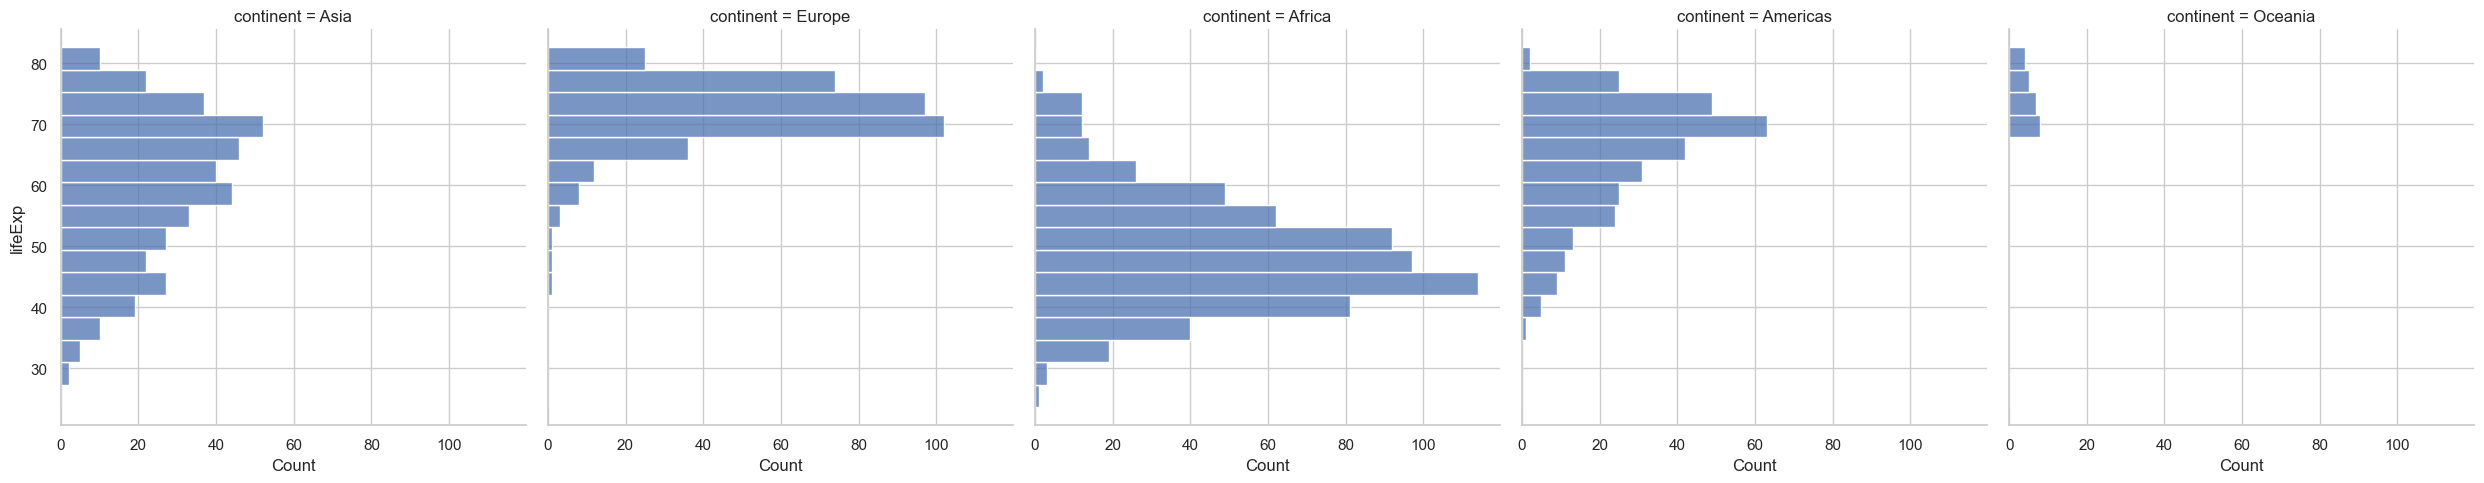

In [12]:
sns.displot(data=df, y="lifeExp", col="continent")

### Categorical Plots
Hint: sns.catplot(), sns.boxplot(), sns.violinplot()

<Axes: xlabel='continent', ylabel='lifeExp'>

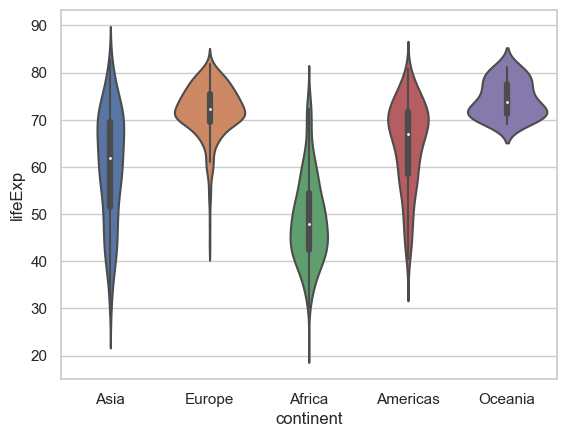

In [13]:
sns.violinplot(data=df, y="lifeExp", x="continent")

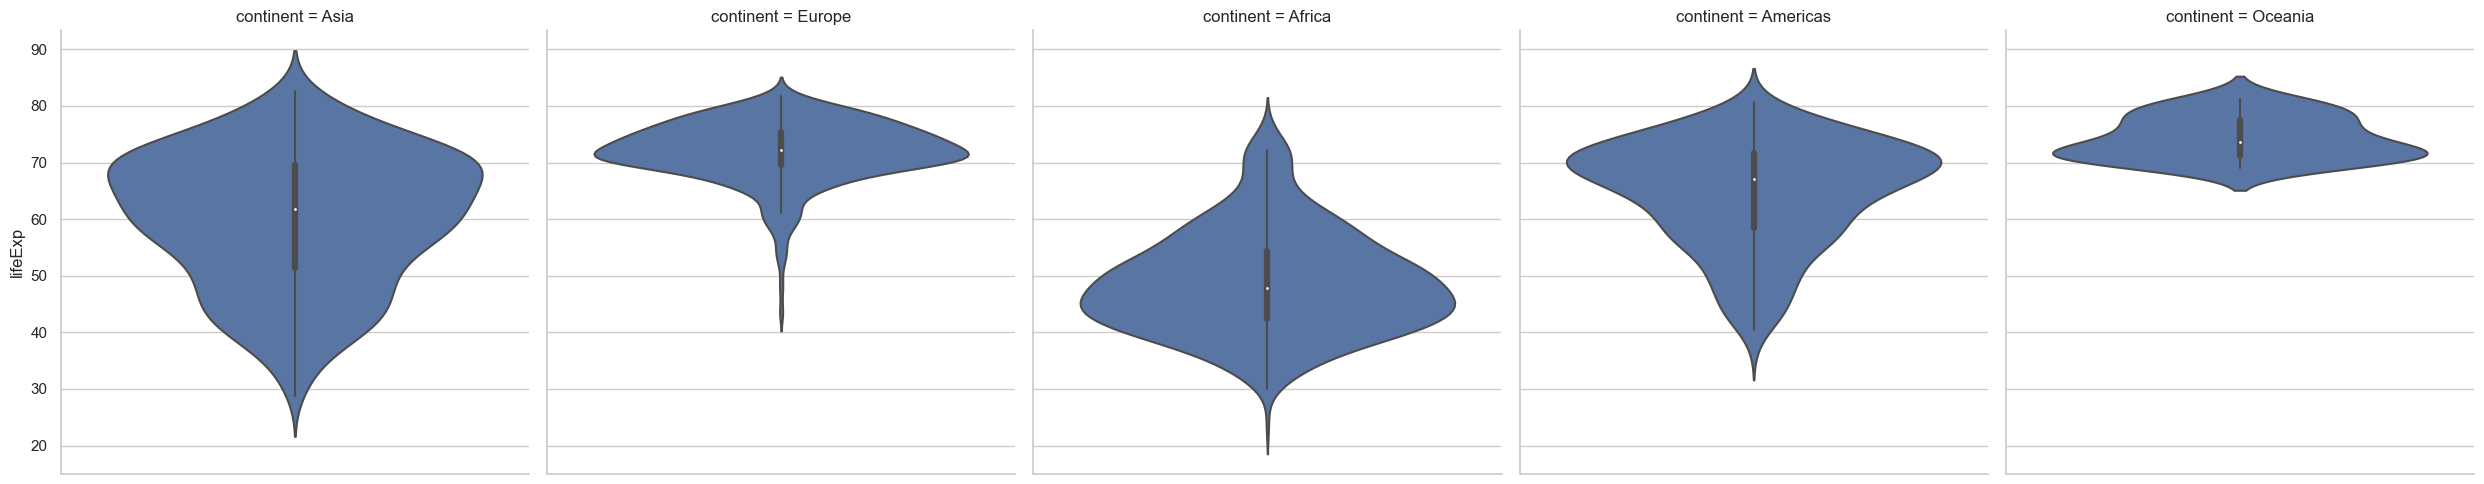

In [14]:
sns.catplot(data=df, y="lifeExp", col="continent", kind="violin")

### Relational Plots
Hint: relplot(), scatterplot(), lineplot()

In [15]:
df["year"].describe()

count    1704.00000
mean     1979.50000
std        17.26533
min      1952.00000
25%      1965.75000
50%      1979.50000
75%      1993.25000
max      2007.00000
Name: year, dtype: float64

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

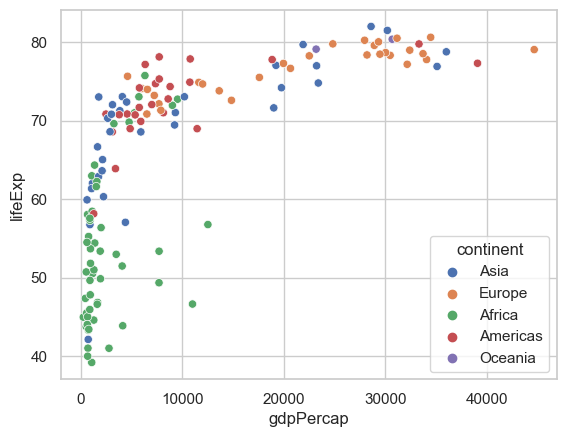

In [16]:
filt = df["year"] == 2002
sns.scatterplot(data=df[filt], y="lifeExp", x="gdpPercap", hue="continent")

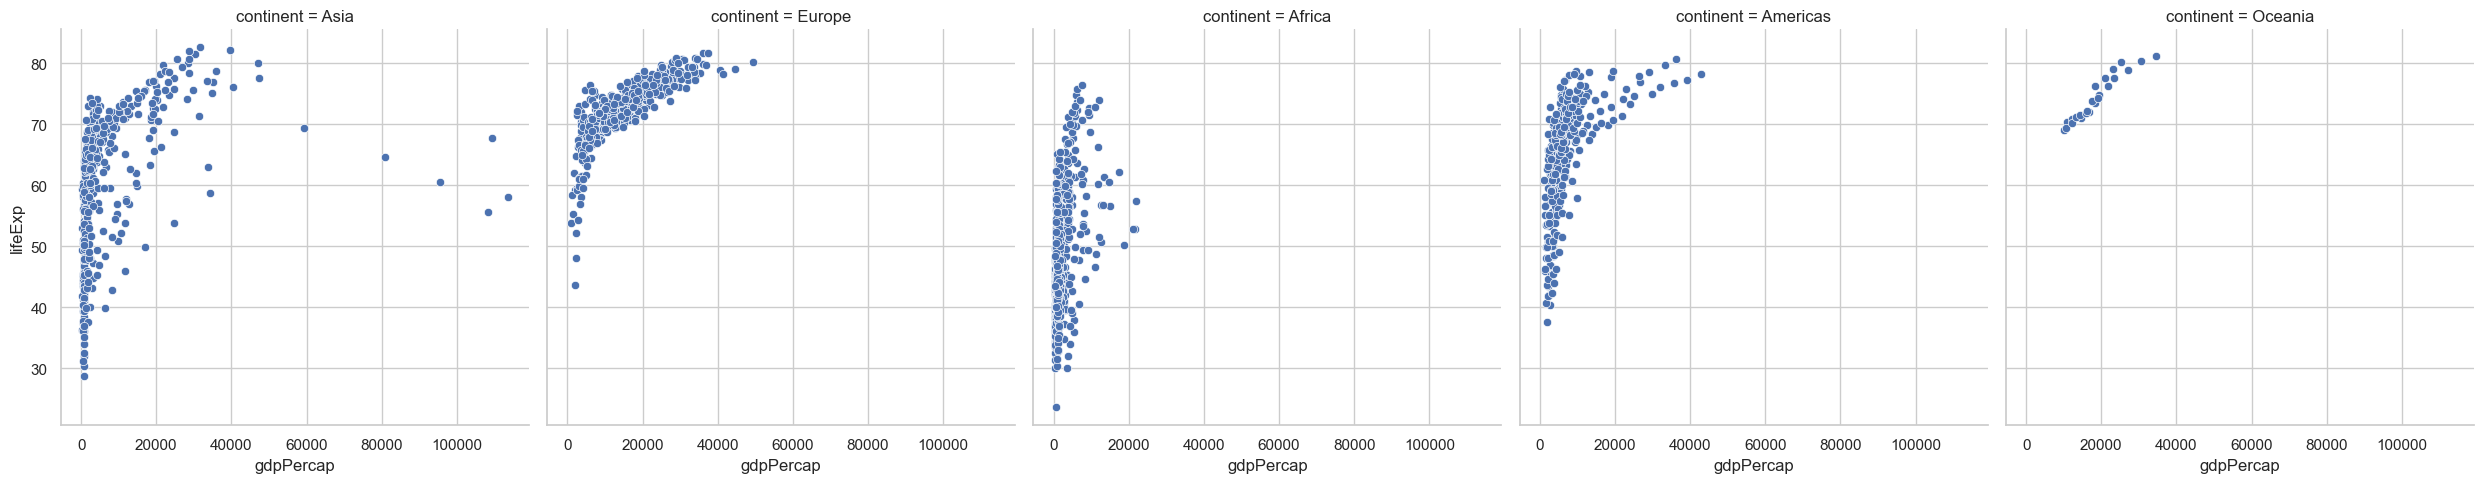

In [17]:
 sns.relplot(data=df, y="lifeExp", x="gdpPercap", col="continent")

## Exercises

### 1) Which is the distribution of Life Expectancy by Countries in Europe?
Hint: sns.boxplot()

<Axes: xlabel='lifeExp', ylabel='country'>

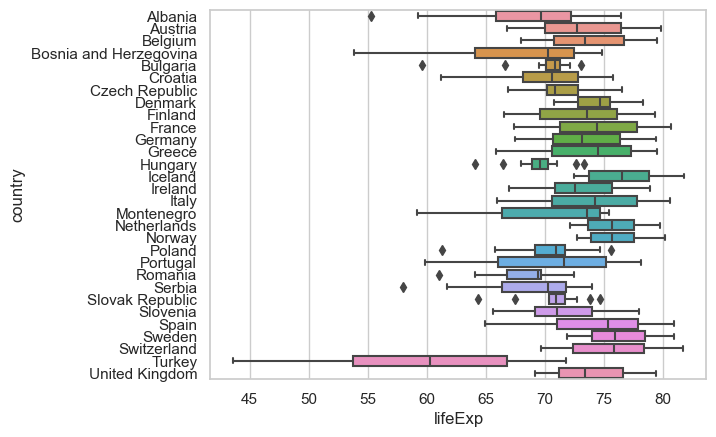

In [18]:
# %load ../solutions/exercise_1.py
europe = df[df['continent']=='Europe']
sns.boxplot(x='lifeExp', y='country', data=europe)

### 2) Which is the evolution of Life Expectancy in Spain, France, Germany and Italy?
- Hint: sns.scatterplot()
- Try: sns.lineplot()

<Axes: xlabel='year', ylabel='lifeExp'>

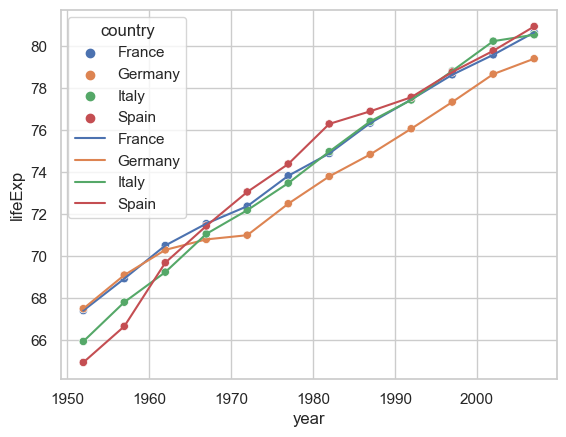

In [19]:
# %load ../solutions/exercise_2.py
siu = df[df['country'].isin(['Spain', 'France', 'Germany', 'Italy'])]
sns.scatterplot(y='lifeExp', x='year', data=siu, hue='country')
sns.lineplot(y='lifeExp', x='year', data=siu, hue='country')

### 3) Which is the relationship between Life Expectancy and GDP in France, Germany, Italy and Spain?
Hint: sns.scatterplot()
Try: sns.lineplot()

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

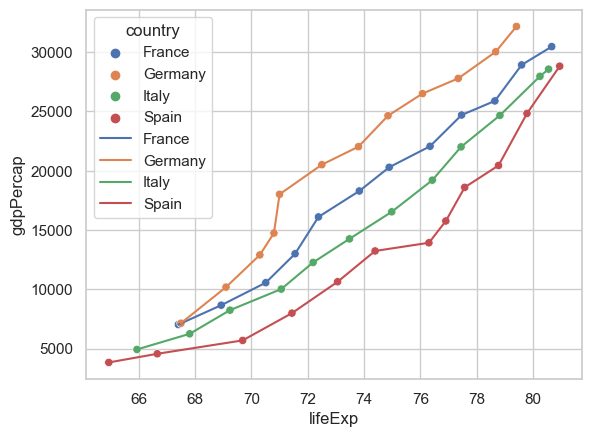

In [20]:
# %load ../solutions/exercise_3.py
sns.scatterplot(x='lifeExp', y='gdpPercap', data=siu, hue='country')
sns.lineplot(x='lifeExp', y='gdpPercap', data=siu, hue='country')

### 4) Which is the Distribution of Life Expectancy by Continent?

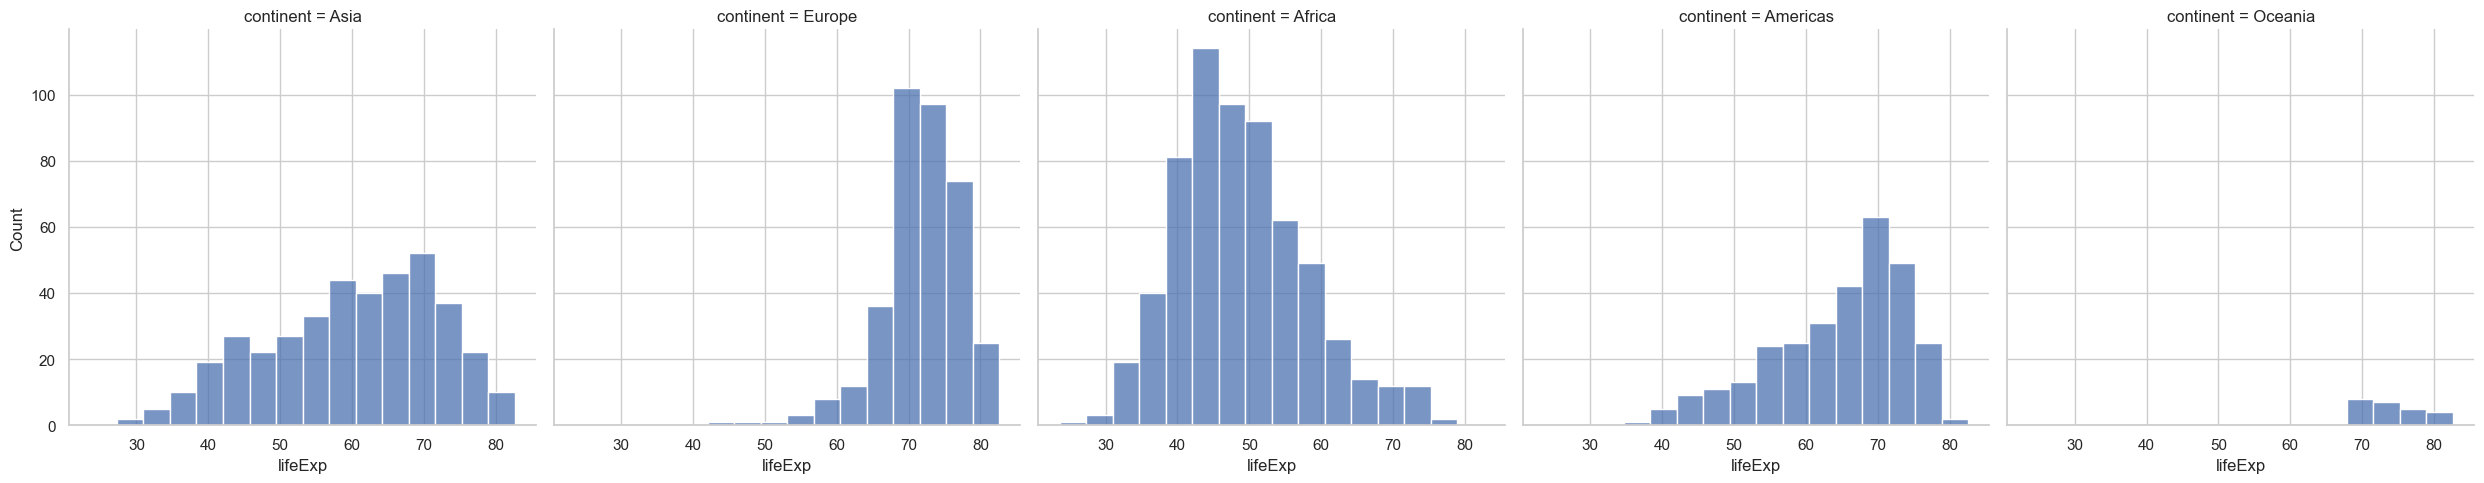

In [21]:
sns.displot(data=df, x="lifeExp", col="continent")

### 5) Which is the evolution of Life Expectancy by Continent?

In [22]:
# %load ../solutions/exercise_5.py

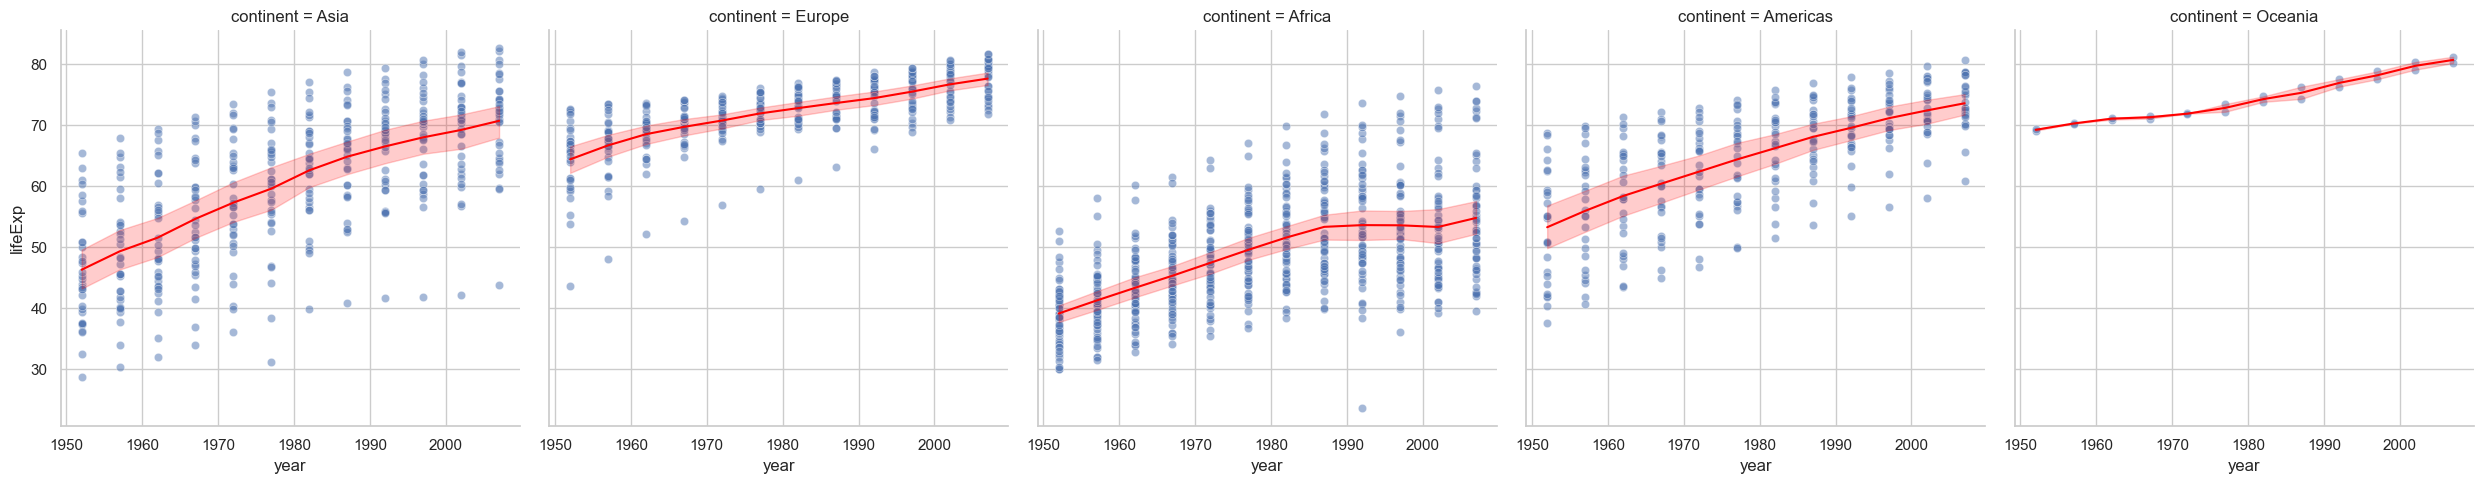

In [35]:
sns.relplot(x='year', y='lifeExp', data=df, col='continent', alpha=.5).map(sns.lineplot, 'year', 'lifeExp', color='red')

### 6) Which is the evolution of Life Expectancy by Continent using Regression?
- Hint: sns.lmplot()
- Try: lowess = True | False 

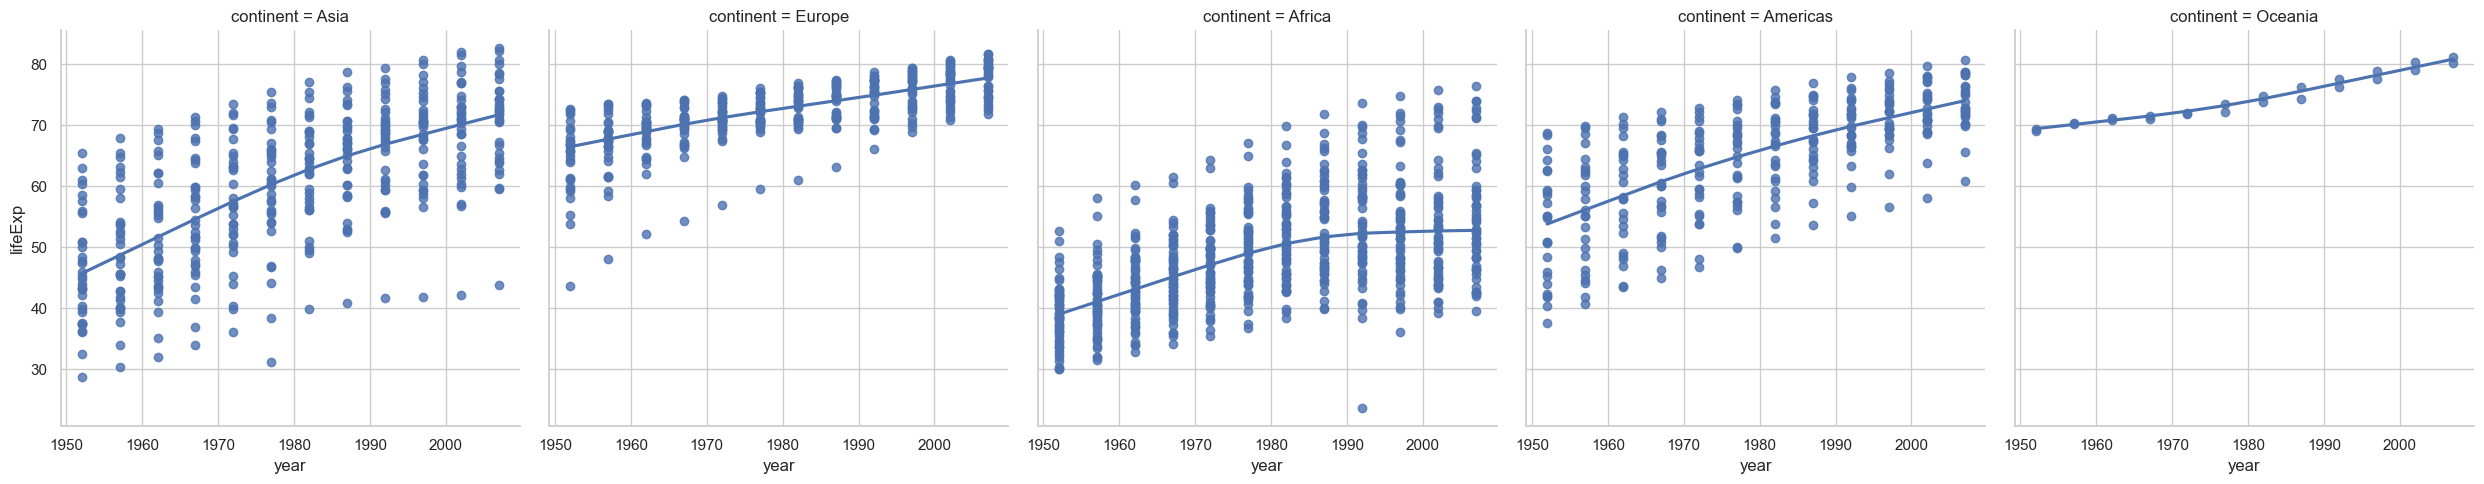

In [33]:
sns.lmplot(data=df, x='year', y='lifeExp', col='continent', lowess= True)

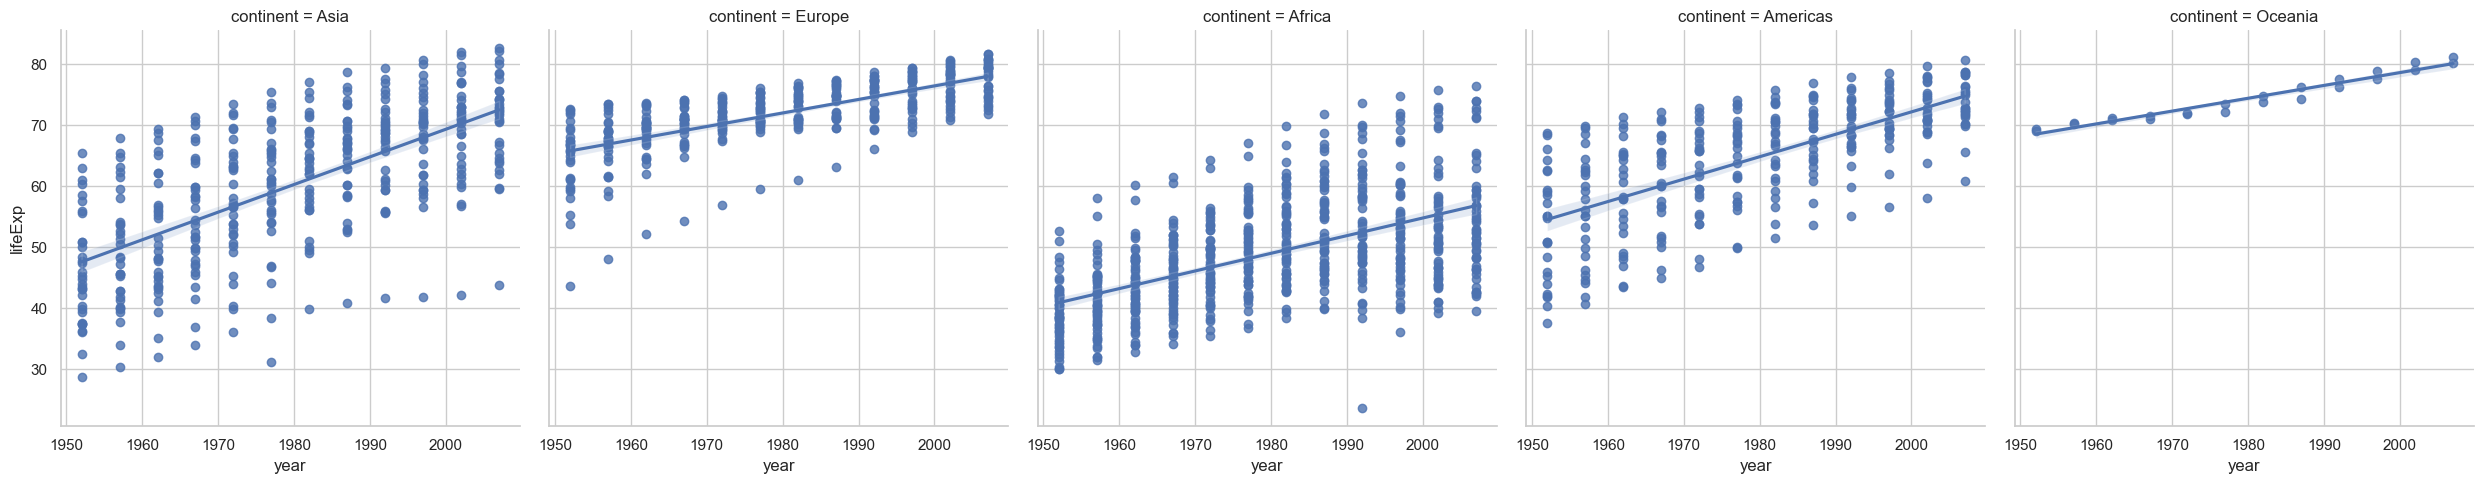

In [30]:
sns.lmplot(data=df, x='year', y='lifeExp', col='continent', lowess= False)

In [ ]:
# %load ../solutions/exercise_6.py